# Example of a Single Tree in an Isolation Forest

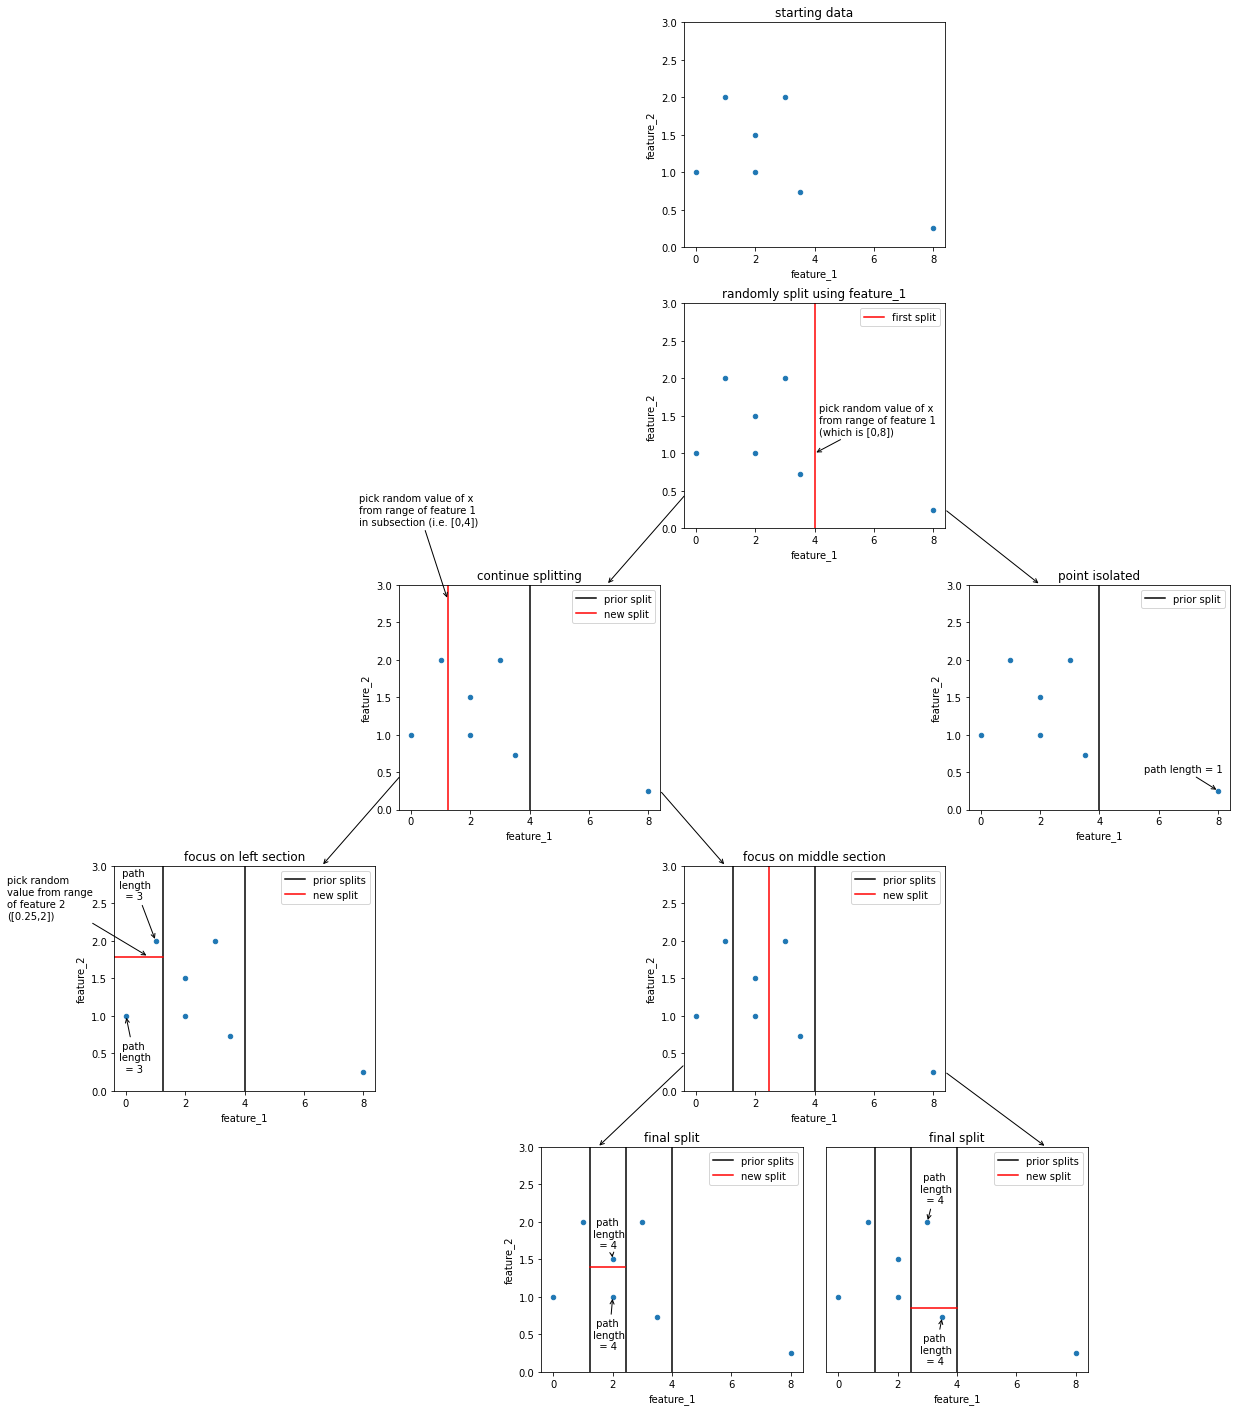

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

df = pd.DataFrame({'feature_1': [0, 1, 2, 8, 3.5, 2, 3], 'feature_2': [1, 2, 1.5, 0.25, 0.73, 1, 2]})

fig = plt.figure(figsize=(20, 30))
grid_dims = (6, 8)
axes = []

# original data
ax = df.plot(
    x='feature_1', y='feature_2', kind='scatter', title='starting data', 
    ax=plt.subplot2grid(grid_dims, (0, 4), colspan=2)
)
axes.append(ax)
plt.subplots_adjust(hspace=0.25)

# first split
ax = df.plot(
    x='feature_1', y='feature_2', kind='scatter', title='randomly split using feature_1', 
    ax=plt.subplot2grid(grid_dims, (1, 4), colspan=2)
)
ax.axvline(x=4, label='first split', color='red')
ax.annotate(
    'pick random value of x\nfrom range of feature 1\n(which is [0,8])', 
    xy=(4, 1), xytext=(4.15, 1.25), arrowprops=dict(arrowstyle='->')
)
ax.legend()
axes.append(ax)

# second split
ax = df.plot(
    x='feature_1', y='feature_2', kind='scatter', title='continue splitting', 
    ax=plt.subplot2grid(grid_dims, (2, 2), colspan=2)
)
ax.axvline(x=4, label='prior split', color='black')
ax.axvline(x=1.25, label='new split', color='red')
ax.legend()
ax.annotate(
    'pick random value of x\nfrom range of feature 1\nin subsection (i.e. [0,4])', 
    xy=(1.24, 2.8), xytext=(-1.75, 3.8), arrowprops=dict(arrowstyle='->')
)
ax.annotate('', xy=(6.6, 3), xytext=(9.25, 4.2), arrowprops=dict(arrowstyle='->'))
axes.append(ax)

# third split
ax = df.plot(
    x='feature_1', y='feature_2', kind='scatter', title='focus on left section', 
    ax=plt.subplot2grid(grid_dims, (3, 0), colspan=2)
)
ax.axvline(x=4, label='prior splits', color='black')
ax.axvline(x=1.25, color='black')
ax.axhline(y=1.79, xmax=0.1875, label='new split', color='red')
ax.annotate(
    'pick random\nvalue from range\nof feature 2\n([0.25,2])', 
    xy=(0.75, 1.79), xytext=(-4, 2.3), arrowprops=dict(arrowstyle='->')
)
ax.legend()
ax.annotate(' path\nlength\n  = 3', xy=(0, 1), xytext=(-0.25, 0.25), arrowprops=dict(arrowstyle='->'))
ax.annotate(' path\nlength\n  = 3', xy=(1, 2), xytext=(-0.25, 2.55), arrowprops=dict(arrowstyle='->'))
ax.annotate('', xy=(6.6, 3), xytext=(9.25, 4.2), arrowprops=dict(arrowstyle='->'))
axes.append(ax)

# fourth split
ax = df.plot(
    x='feature_1', y='feature_2', kind='scatter', title='focus on middle section', 
    ax=plt.subplot2grid(grid_dims, (3, 4), colspan=2)
)
ax.axvline(x=4, label='prior splits', color='black')
ax.axvline(x=1.25, color='black')
ax.axvline(x=2.45, label='new split', color='red')
ax.annotate('', xy=(1, 3), xytext=(-1.2, 4), arrowprops=dict(arrowstyle='->'))
ax.legend()
axes.append(ax)

# fifth split
ax = df.plot(
    x='feature_1', y='feature_2', kind='scatter', title='final split', 
    ax=plt.subplot2grid(grid_dims, (4, 3), colspan=2)
)
ax.axvline(x=4, label='prior splits', color='black')
ax.axvline(x=1.25, color='black')
ax.axvline(x=2.45, color='black')
ax.axhline(y=1.4, xmin=0.1875, xmax=0.32, label='new split', color='red')
ax.legend()
ax.annotate(' path\nlength\n  = 4', xy=(2, 1.5), xytext=(1.35, 1.65), arrowprops=dict(arrowstyle='->'))
ax.annotate(' path\nlength\n  = 4', xy=(2, 1), xytext=(1.35, 0.3), arrowprops=dict(arrowstyle='->'))
ax.annotate('', xy=(1.5, 3), xytext=(4.42, 4.1), arrowprops=dict(arrowstyle='->'))
axes.append(ax)

ax = df.plot(
    x='feature_1', y='feature_2', kind='scatter', title='final split', 
    ax=plt.subplot2grid(grid_dims, (4, 5), colspan=2)
)
ax.axvline(x=4, label='prior splits', color='black')
ax.axvline(x=1.25, color='black')
ax.axvline(x=2.45, color='black')
ax.axhline(y=0.85, xmin=0.325, xmax=0.5, label='new split', color='red')
ax.set_ylabel('')
ax.set_yticks([])
ax.legend()
ax.annotate(' path\nlength\n  = 4', xy=(3, 2), xytext=(2.75, 2.25), arrowprops=dict(arrowstyle='->'))
ax.annotate(' path\nlength\n  = 4', xy=(3.5, 0.73), xytext=(2.75, 0.1), arrowprops=dict(arrowstyle='->'))
ax.annotate('', xy=(7, 3), xytext=(3.6, 4), arrowprops=dict(arrowstyle='->'))
axes.append(ax)

ax = df.plot(
    x='feature_1', y='feature_2', kind='scatter', title='point isolated', 
    ax=plt.subplot2grid(grid_dims, (2, 6), colspan=2)
)
ax.axvline(x=4, label='prior split', color='black')
ax.legend()
ax.annotate('path length = 1', xy=(8, 0.25), xytext=(5.5, 0.5), arrowprops=dict(arrowstyle='->'))
ax.annotate('', xy=(2, 3), xytext=(-1.2, 4), arrowprops=dict(arrowstyle='->'))
axes.append(ax)

for ax in axes:
    ax.set_ylim(0, 3)
    
plt.savefig('iso_forest_viz.png', bbox_inches='tight')